<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/customer_segmentation_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Packages**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [ ]:
customer = pd.read_csv('/content/Cust_Segmentation.csv')
customer.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### **Preprocessing**

**Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
customer_encoded = LabelEncoder().fit_transform(customer['Address'])
customer['Address'] = customer_encoded

In [ ]:
customer.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,1,6.3
1,2,47,1,26,100,4.582,8.218,0.0,21,12.8
2,3,33,2,10,57,6.111,5.802,1.0,13,20.9
3,4,29,2,4,19,0.681,0.516,0.0,9,6.3
4,5,47,1,31,253,9.308,8.908,0.0,8,7.2


In [ ]:
customer['Address'].value_counts()

,count
Address,
1,71
2,71
0,60
4,58
3,55
6,50
8,49
9,45
5,43


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(customer)

array([[-1.7300143 ,  0.74291541,  0.31212243, ..., -0.59494973,
        -1.072784  , -0.57652509],
       [-1.72593888,  1.48949049, -0.76634938, ..., -0.59494973,
         1.84099264,  0.39138677],
       [-1.72186347, -0.25251804,  0.31212243, ...,  1.68081427,
         0.67548198,  1.59755385],
       ...,
       [ 1.72186347, -1.24795149,  2.46906604, ...,  1.68081427,
        -1.072784  ,  3.45892281],
       [ 1.72593888, -0.37694723, -0.76634938, ..., -0.59494973,
         0.52979315, -1.08281745],
       [ 1.7300143 ,  2.1116364 , -0.76634938, ..., -0.59494973,
         2.42374797, -0.2340332 ]])

In [ ]:
customer.isna().sum()

,0
Customer Id,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,150
Address,0
DebtIncomeRatio,0


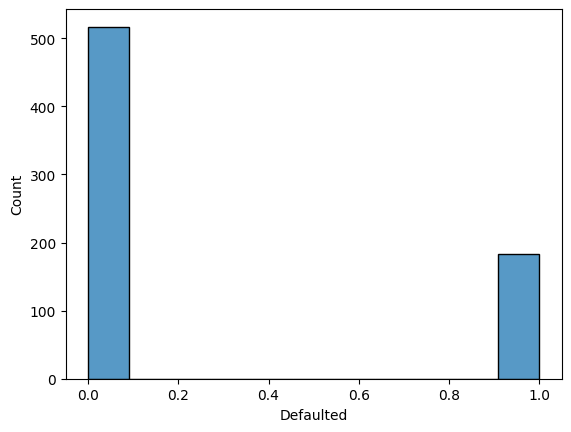

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'customer' is your DataFrame and 'Age' is the column you want to plot
sns.histplot(data=customer, x='Defaulted')
plt.show()

In [ ]:
customer.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,8.363529,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.867985,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,3.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,7.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,12.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,31.000000,41.300000


In [ ]:
print(customer['Defaulted'].median())

0.0


In [27]:
#Replacing all missing values using interpolation
customer['Defaulted'] = customer['Defaulted'].interpolate(method='linear')

In [28]:
customer.isnull().sum()

,0
Customer Id,0
Age,0
Edu,0
Years Employed,0
Income,0
Card Debt,0
Other Debt,0
Defaulted,0
Address,0
DebtIncomeRatio,0


### **Modelling**

In [35]:
#Using kmeans for modelling
X = customer.drop('Customer Id', axis=1)
kmeans = KMeans(init = 'k-means++', n_clusters = 3, n_init=12)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=12)

In [36]:
labels = kmeans.labels_
labels

array([0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,

In [37]:
kmeans.cluster_centers_

array([[3.29335394e+01, 1.61360124e+00, 6.35394127e+00, 3.10880989e+01,
        1.03372798e+00, 2.10396754e+00, 2.77434312e-01, 7.31993818e+00,
        1.01105100e+01, 9.87635240e-01],
       [4.53888889e+01, 2.66666667e+00, 1.95555556e+01, 2.27166667e+02,
        5.67844444e+00, 1.09071667e+01, 2.22222222e-01, 1.61666667e+01,
        7.32222222e+00, 8.88888889e-01],
       [4.13513514e+01, 1.95675676e+00, 1.52324324e+01, 8.36270270e+01,
        3.07709730e+00, 5.72627568e+00, 1.89189189e-01, 1.12540541e+01,
        1.06627027e+01, 1.04324324e+00]])

### **Insights**

Assigning the labels to each row in the dataframe

In [39]:
X['Cluster'] = labels
X.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
0,41,2,6,19,0.124,1.073,0.0,1,6.3,0
1,47,1,26,100,4.582,8.218,0.0,21,12.8,2
2,33,2,10,57,6.111,5.802,1.0,13,20.9,0
3,29,2,4,19,0.681,0.516,0.0,9,6.3,0
4,47,1,31,253,9.308,8.908,0.0,8,7.2,1


Check the centroid values by averaging the features in each class

In [40]:
X.groupby('Cluster').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
Cluster,,,,,,,,,
0,32.933539,1.613601,6.353941,31.088099,1.033728,2.103968,0.277434,7.319938,10.110510
1,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.222222,16.166667,7.322222
2,41.351351,1.956757,15.232432,83.627027,3.077097,5.726276,0.189189,11.254054,10.662703


Distribution based on age and income

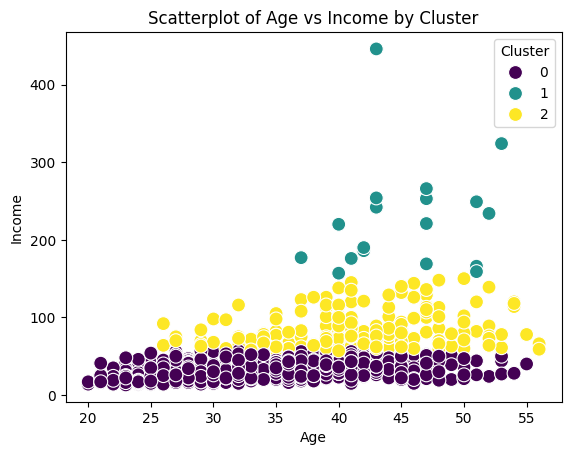

In [43]:
sns.scatterplot(x='Age', y='Income', hue='Cluster', data=X, palette='viridis', s=100)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatterplot of Age vs Income by Cluster')

# Show the plot
plt.show()